# Significant Earthquakes-EDA

The National Earthquake Information Center (NEIC) determines the location and size of all significant earthquakes that occur worldwide and disseminates this information immediately to national and international agencies, scientists, critical facilities, and the general public. The NEIC compiles and provides to scientists and to the public an extensive seismic database that serves as a foundation for scientific research through the operation of modern digital national and global seismograph networks and cooperative international agreements. The NEIC is the national data center and archive for earthquake information.

This dataset includes a record of the date, time, location, depth, magnitude, and source of every earthquake with a reported magnitude 5.5 or higher since 1965.

Conduct an EDA on the dataset and try to uncover meaningful and/or interesting insights from the dataset.

In [1]:
# Set this environment variable pointing the PROJ lib of the installation
import os
os.environ['PROJ_LIB'] = r'C:\ProgramData\Anaconda3\pkgs\proj4-5.2.0-hfa6e2cd_1001\Library\share'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
from mpl_toolkits.basemap import Basemap   # this package has to installed separately
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'retina'

In [3]:
# Load the dataset
import pandas as pd
earthquakedf = pd.read_csv(r"C:\Users\Guestuser\earthquake.csv")

In [4]:
# printing the first few coloumns
earthquakedf.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [5]:
# How many rows and coloumns are there
earthquakedf.shape

(23412, 21)

In [6]:
# total number of elements in the dataset
earthquakedf.size

491652

In [7]:
# quick summary about the dataset
earthquakedf.describe()

,Latitude,Longitude,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square
count,23412.000000,23412.000000,23412.000000,4461.000000,7097.000000,23412.000000,327.000000,2564.000000,7299.000000,1604.000000,1156.000000,17352.000000
mean,1.679033,39.639961,70.767911,4.993115,275.364098,5.882531,0.071820,48.944618,44.163532,3.992660,7.662759,1.022784
std,30.113183,125.511959,122.651898,4.875184,162.141631,0.423066,0.051466,62.943106,32.141486,5.377262,10.430396,0.188545
min,-77.080000,-179.997000,-1.100000,0.000000,0.000000,5.500000,0.000000,0.000000,0.000000,0.004505,0.085000,0.000000
25%,-18.653000,-76.349750,14.522500,1.800000,146.000000,5.600000,0.046000,10.000000,24.100000,0.968750,5.300000,0.900000
50%,-3.568500,103.982000,33.000000,3.500000,255.000000,5.700000,0.059000,28.000000,36.000000,2.319500,6.700000,1.000000
75%,26.190750,145.026250,54.000000,6.300000,384.000000,6.000000,0.075500,66.000000,54.000000,4.724500,8.100000,1.130000
max,86.005000,179.998000,700.000000,91.295000,934.000000,9.100000,0.410000,821.000000,360.000000,37.874000,99.000000,3.440000


In [8]:
# is there any null values in the dataset ?
earthquakedf.isnull().sum()

Date                              0
Time                              0
Latitude                          0
Longitude                         0
Type                              0
Depth                             0
Depth Error                   18951
Depth Seismic Stations        16315
Magnitude                         0
Magnitude Type                    3
Magnitude Error               23085
Magnitude Seismic Stations    20848
Azimuthal Gap                 16113
Horizontal Distance           21808
Horizontal Error              22256
Root Mean Square               6060
ID                                0
Source                            0
Location Source                   0
Magnitude Source                  0
Status                            0
dtype: int64

From the above we can see that there are many null values.
We will mainly analyse the columns with the non-values 

In [9]:
# understanding about the type of each feature
earthquakedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
Date                          23412 non-null object
Time                          23412 non-null object
Latitude                      23412 non-null float64
Longitude                     23412 non-null float64
Type                          23412 non-null object
Depth                         23412 non-null float64
Depth Error                   4461 non-null float64
Depth Seismic Stations        7097 non-null float64
Magnitude                     23412 non-null float64
Magnitude Type                23409 non-null object
Magnitude Error               327 non-null float64
Magnitude Seismic Stations    2564 non-null float64
Azimuthal Gap                 7299 non-null float64
Horizontal Distance           1604 non-null float64
Horizontal Error              1156 non-null float64
Root Mean Square              17352 non-null float64
ID                            23412 non-null object
Sou

In [10]:
# From the above we can see that Date is not showing as Date, we will convert it to date
earthquakedf["Date"] = pd.to_datetime(earthquakedf["Date"])

In [11]:
# let us print check the date again
earthquakedf.tail()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
23407,2016-12-28,08:22:12,38.3917,-118.8941,Earthquake,12.30,1.2,40.0,5.6,ML,...,18.0,42.47,0.120,NaN,0.1898,NN00570710,NN,NN,NN,Reviewed
23408,2016-12-28,09:13:47,38.3777,-118.8957,Earthquake,8.80,2.0,33.0,5.5,ML,...,18.0,48.58,0.129,NaN,0.2187,NN00570744,NN,NN,NN,Reviewed
23409,2016-12-28,12:38:51,36.9179,140.4262,Earthquake,10.00,1.8,NaN,5.9,MWW,...,NaN,91.00,0.992,4.8,1.5200,US10007NAF,US,US,US,Reviewed
23410,2016-12-29,22:30:19,-9.0283,118.6639,Earthquake,79.00,1.8,NaN,6.3,MWW,...,NaN,26.00,3.553,6.0,1.4300,US10007NL0,US,US,US,Reviewed
23411,2016-12-30,20:08:28,37.3973,141.4103,Earthquake,11.94,2.2,NaN,5.5,MB,...,428.0,97.00,0.681,4.5,0.9100,US10007NTD,US,US,US,Reviewed


In [12]:
# let print the info again to see the date type
earthquakedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
Date                          23412 non-null datetime64[ns]
Time                          23412 non-null object
Latitude                      23412 non-null float64
Longitude                     23412 non-null float64
Type                          23412 non-null object
Depth                         23412 non-null float64
Depth Error                   4461 non-null float64
Depth Seismic Stations        7097 non-null float64
Magnitude                     23412 non-null float64
Magnitude Type                23409 non-null object
Magnitude Error               327 non-null float64
Magnitude Seismic Stations    2564 non-null float64
Azimuthal Gap                 7299 non-null float64
Horizontal Distance           1604 non-null float64
Horizontal Error              1156 non-null float64
Root Mean Square              17352 non-null float64
ID                            23412 non-null ob

In [13]:
# let us print the coloumn names
earthquakedf.columns

Index(['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error',
       'Depth Seismic Stations', 'Magnitude', 'Magnitude Type',
       'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap',
       'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID',
       'Source', 'Location Source', 'Magnitude Source', 'Status'],
      dtype='object')

### How many earthqucke types are there ?

In [14]:
earthquakeTypes = earthquakedf.pivot_table(index = "Type", values = "Magnitude", aggfunc=len)
earthquakeTypes

,Magnitude
Type,
Earthquake,23232.0
Explosion,4.0
Nuclear Explosion,175.0
Rock Burst,1.0


We can see that Earthquake category is heighest followed by Nuclear Explosion

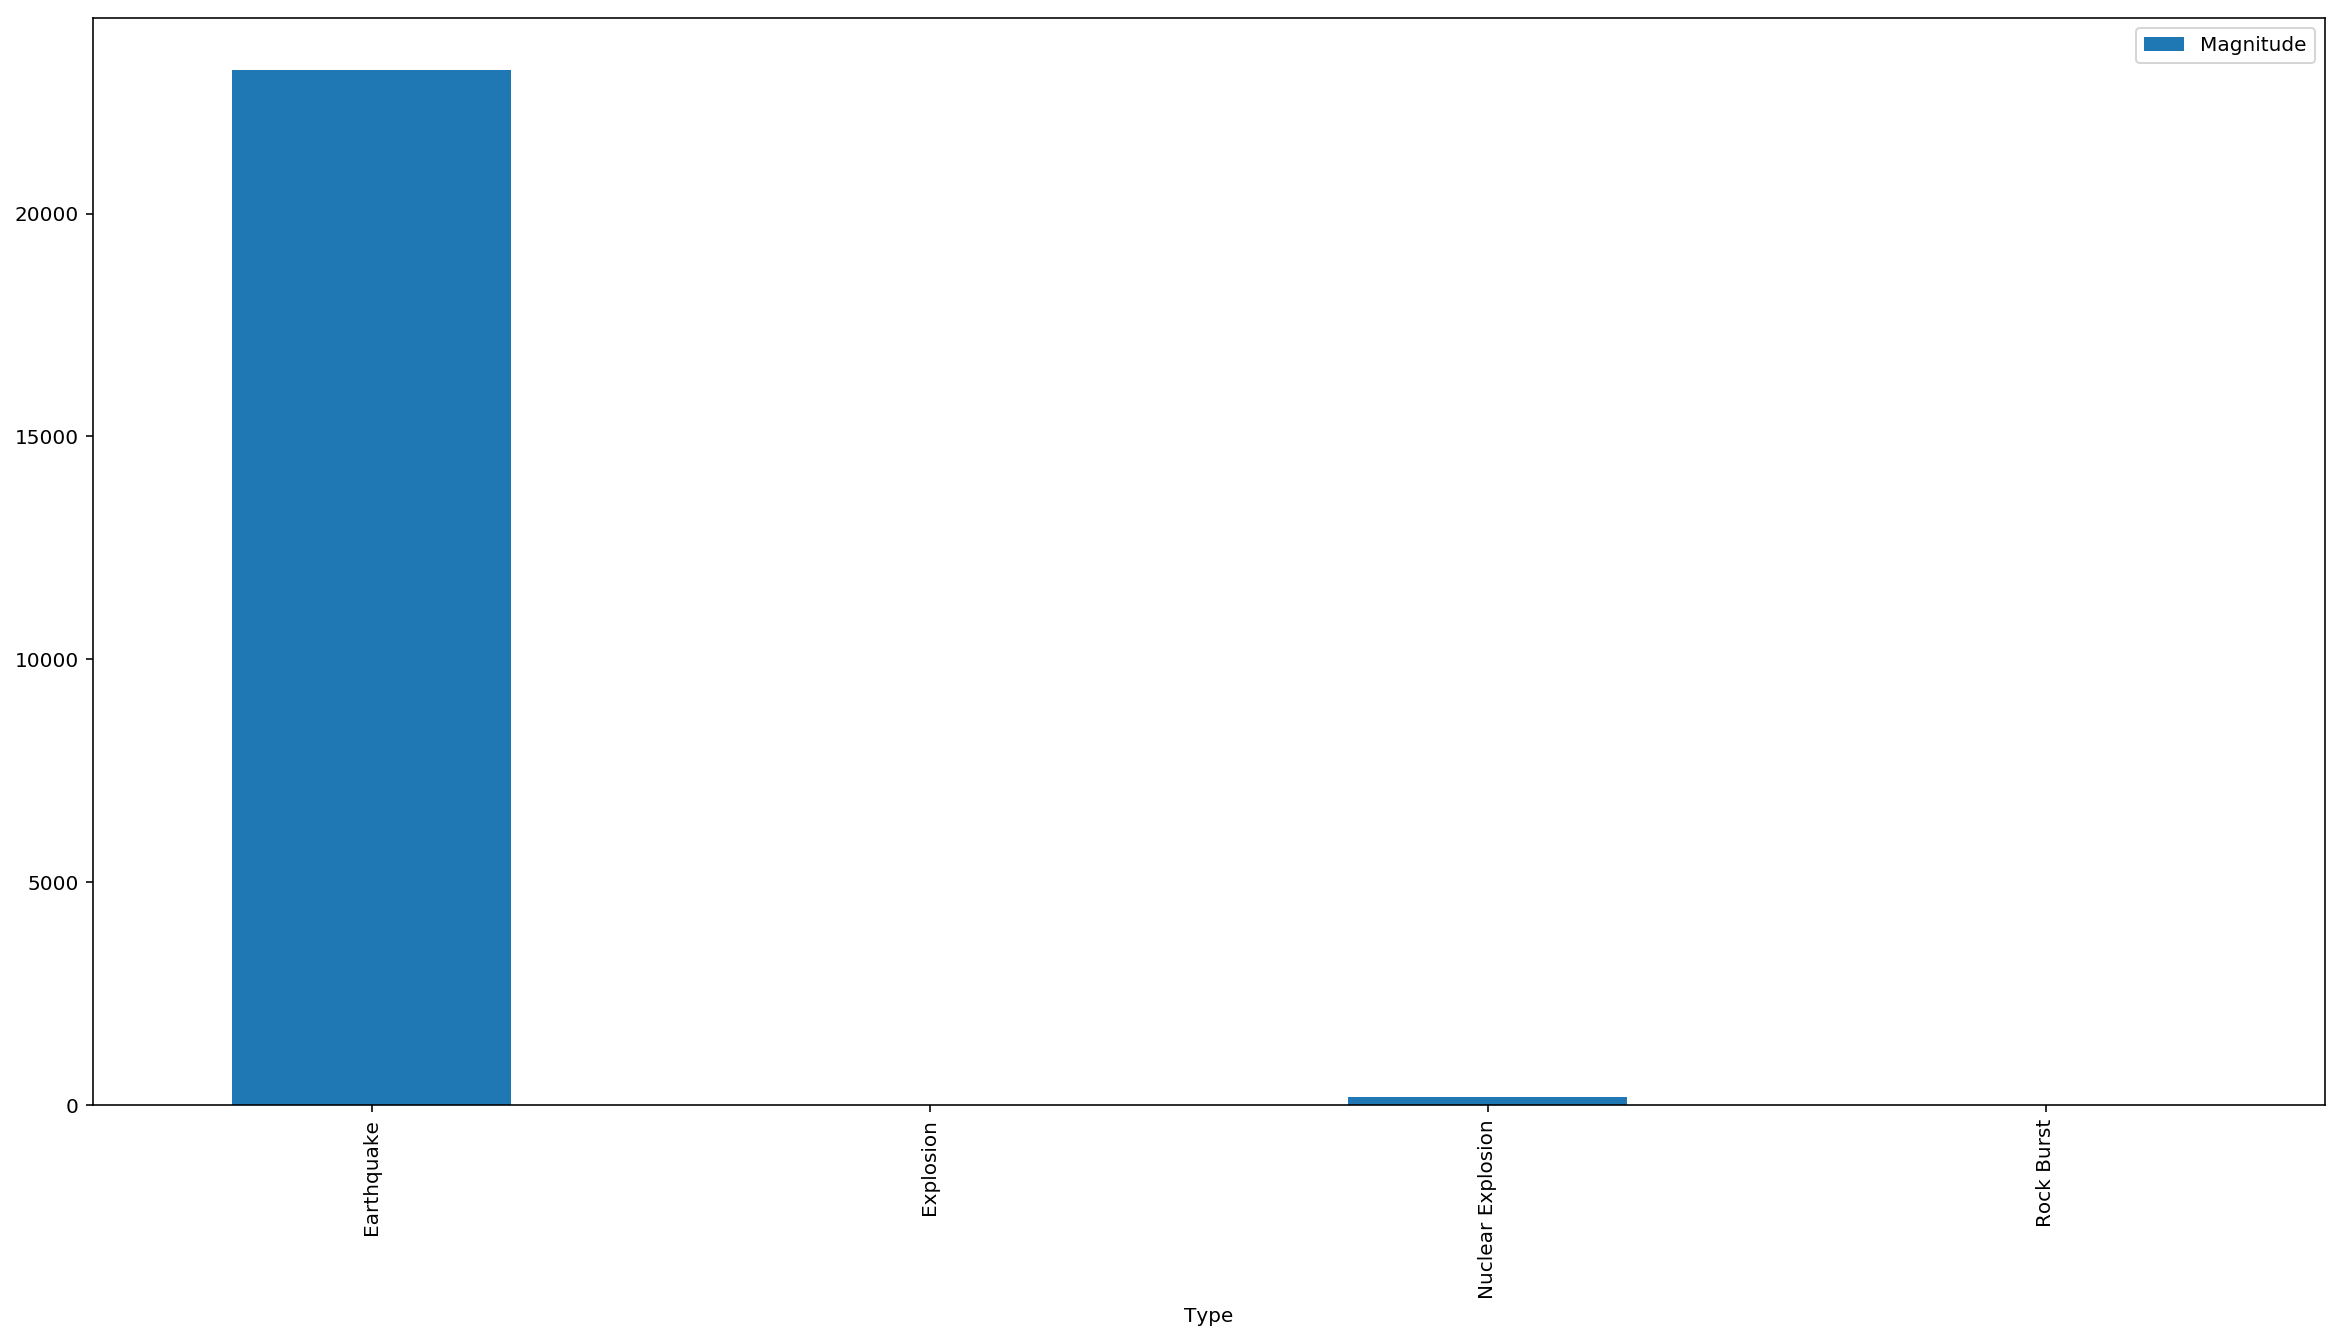

In [15]:
# plotting the Earthquake types
earthquakeTypes.plot(kind='bar', figsize = (20,10));

###  Understanding the distribution of the data by plotting

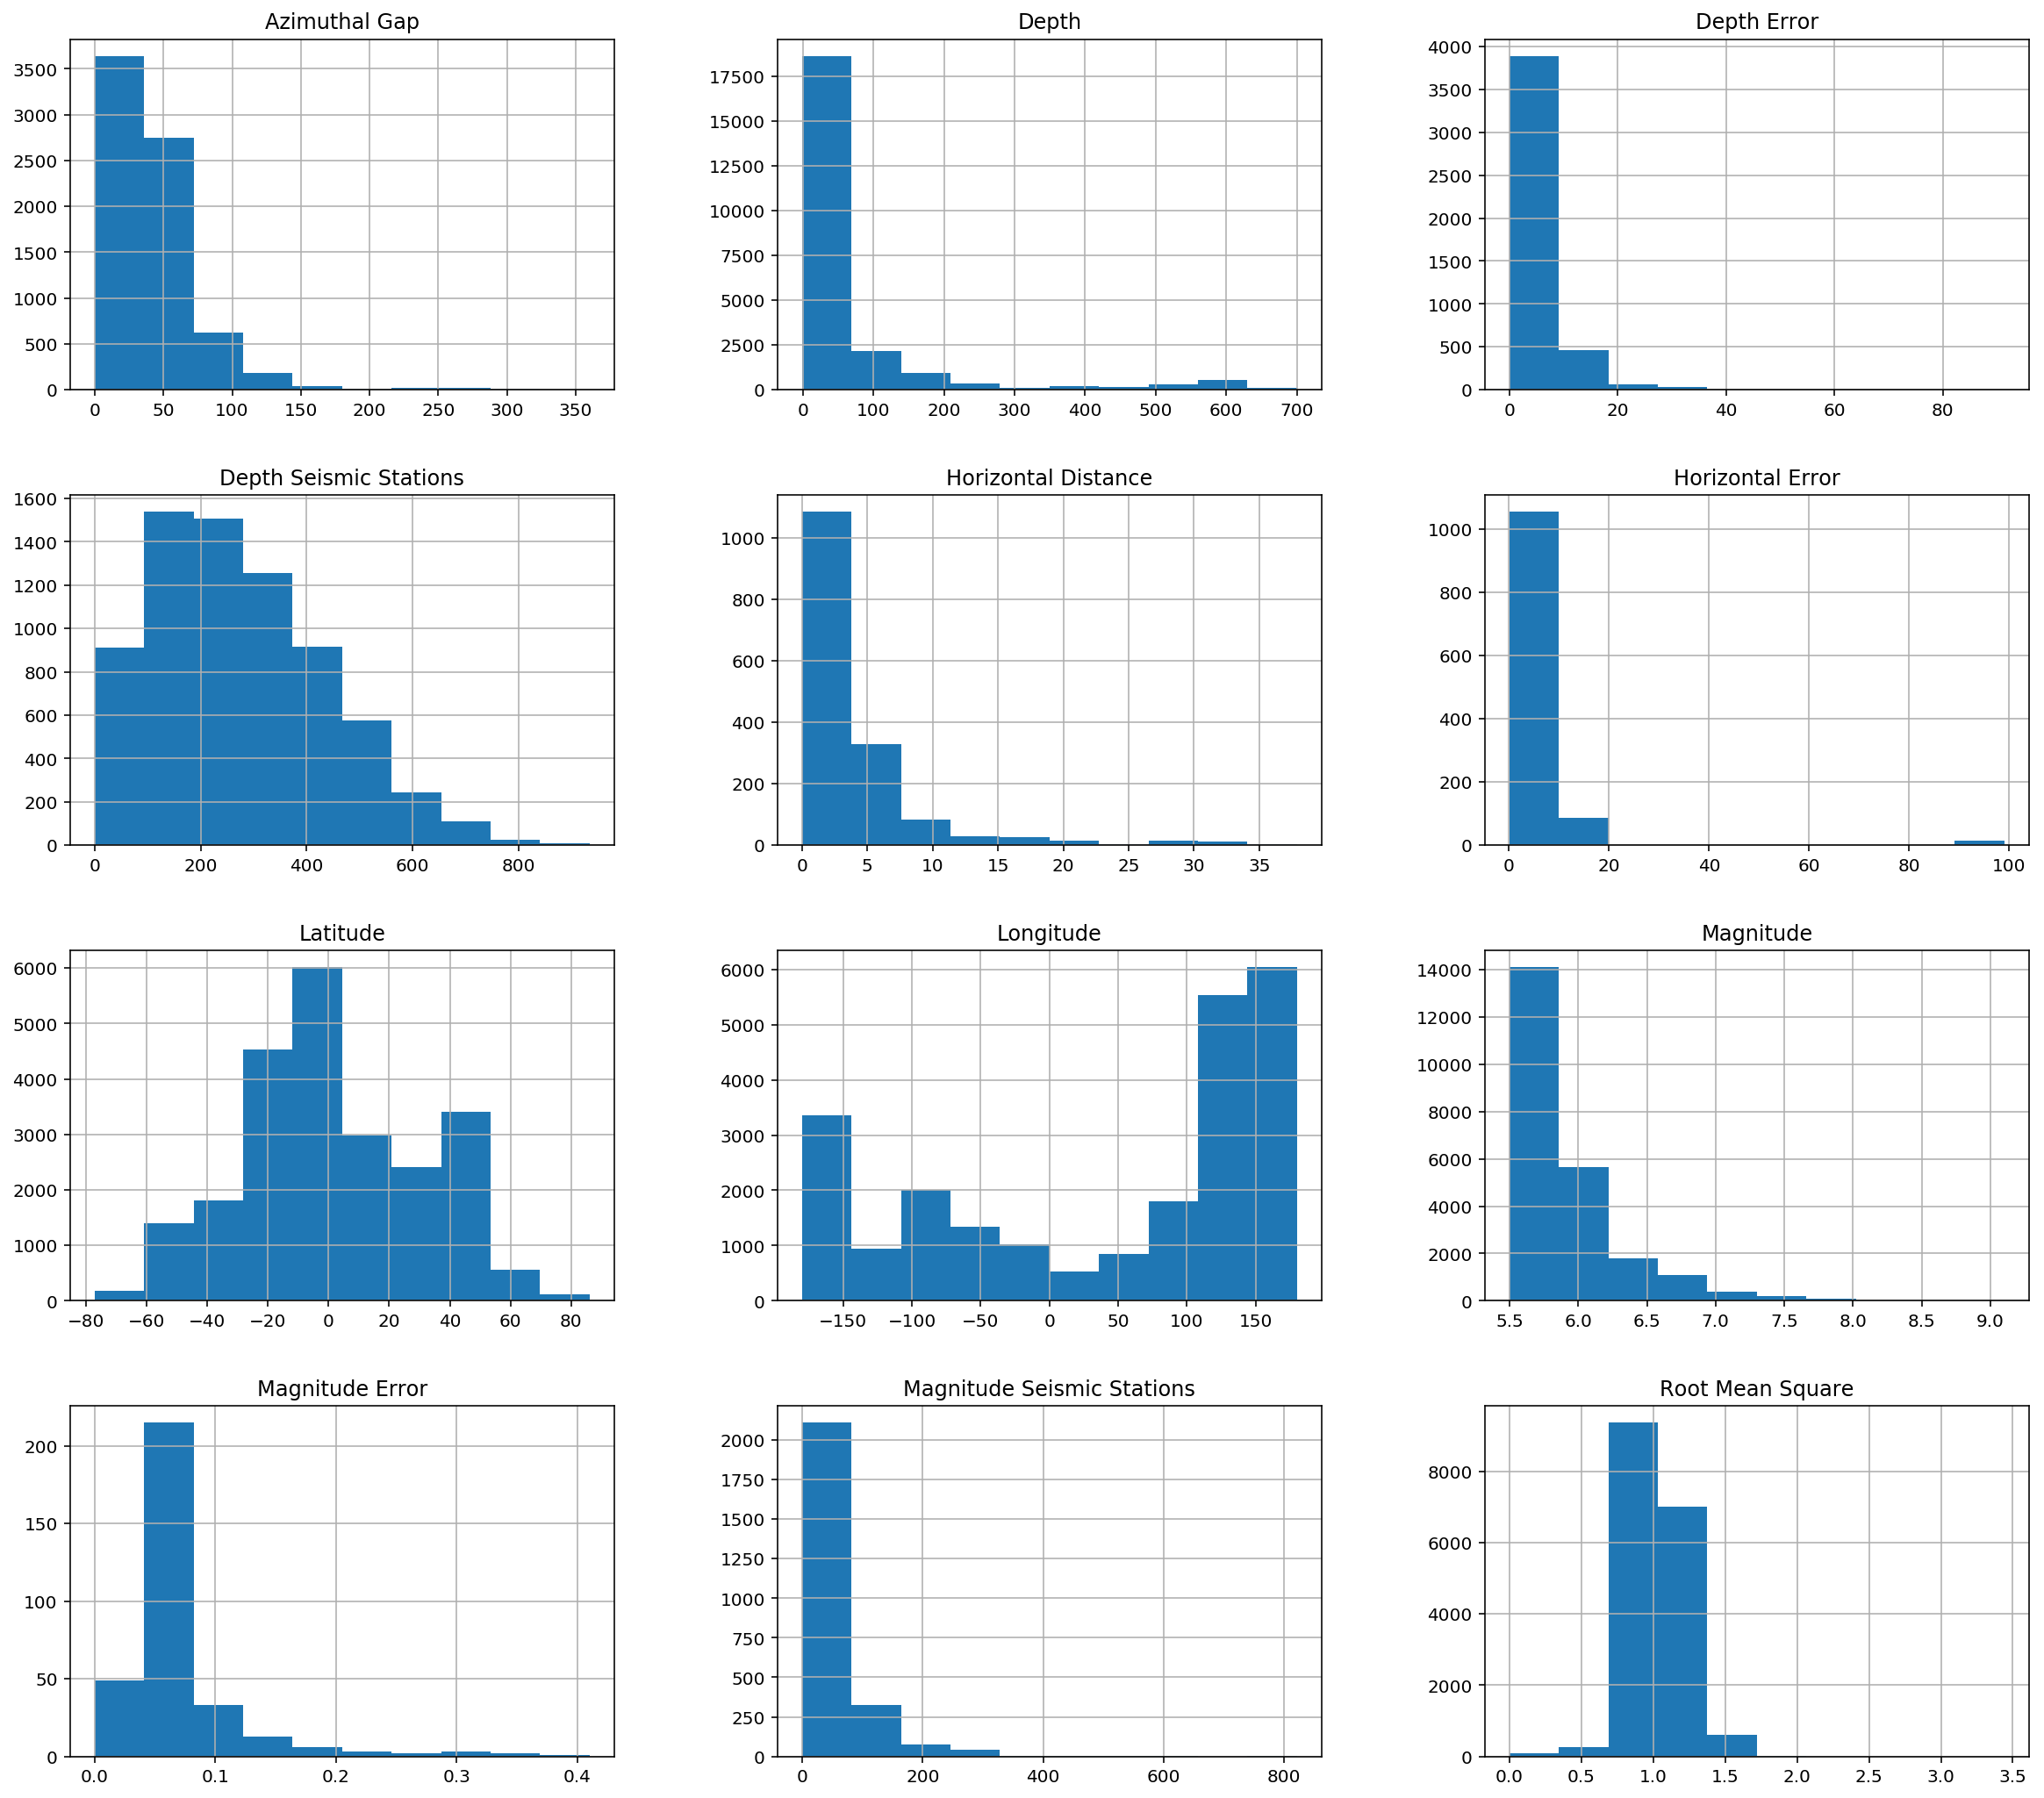

In [16]:
earthquakedf.hist(figsize = (20,18));

In [17]:
# covariance matrix
earthquakedf.cov()

,Latitude,Longitude,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square
Latitude,906.803784,769.316657,-299.241208,0.946018,2074.271147,0.445723,0.196848,628.197905,49.036459,-65.353583,5.084863,-1.200886
Longitude,769.316657,15753.251728,-1321.767854,12.369853,320.671534,2.048516,-1.395796,1164.469533,-933.895217,-89.593301,-124.852317,-0.667570
Depth,-299.241208,-1321.767854,15043.488013,-49.191549,3486.189051,1.217195,-0.421500,-102.239038,-659.351063,-46.984476,-20.103049,-3.200478
Depth Error,0.946018,12.369853,-49.191549,23.767418,-343.402323,-0.264820,0.215229,-53.349161,78.603149,-1.427370,31.384866,0.106555
Depth Seismic Stations,2074.271147,320.671534,3486.189051,-343.402323,26289.908564,30.391943,-2.181287,8307.950951,-2329.048969,1.914330,-466.554158,-5.106245
Magnitude,0.445723,2.048516,1.217195,-0.264820,30.391943,0.178985,0.001288,-0.072934,-3.226387,-0.222042,-0.364528,0.006025
Magnitude Error,0.196848,-1.395796,-0.421500,0.215229,-2.181287,0.001288,0.002649,-2.014351,1.739032,-0.022732,0.787865,0.000561
Magnitude Seismic Stations,628.197905,1164.469533,-102.239038,-53.349161,8307.950951,-0.072934,-2.014351,3961.834622,-1919.651233,-76.734811,-186.928218,-2.719096
Azimuthal Gap,49.036459,-933.895217,-659.351063,78.603149,-2329.048969,-3.226387,1.739032,-1919.651233,1033.075119,-8.225800,221.353846,-0.383264
Horizontal Distance,-65.353583,-89.593301,-46.984476,-1.427370,1.914330,-0.222042,-0.022732,-76.734811,-8.225800,28.914949,5.773425,0.054916


In [18]:
# corelation matrix
earthquakedf.corr()

,Latitude,Longitude,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square
Latitude,1.000000,0.203546,-0.081020,0.007080,0.433815,0.034987,0.113208,0.315075,0.050794,-0.396768,0.015625,-0.214762
Longitude,0.203546,1.000000,-0.085861,0.020552,0.015924,0.038579,-0.214609,0.148510,-0.233097,-0.131313,-0.093827,-0.028061
Depth,-0.081020,-0.085861,1.000000,-0.074609,0.174663,0.023457,-0.076918,-0.015254,-0.171162,-0.073832,-0.016467,-0.134002
Depth Error,0.007080,0.020552,-0.074609,1.000000,-0.320579,-0.135880,0.618254,-0.093292,0.357704,-0.077423,0.644593,0.094398
Depth Seismic Stations,0.433815,0.015924,0.174663,-0.320579,1.000000,0.440582,-0.385993,0.813374,-0.420556,0.056619,-0.214959,-0.158620
Magnitude,0.034987,0.038579,0.023457,-0.135880,0.440582,1.000000,0.135573,-0.003972,-0.233579,-0.092609,-0.078406,0.075865
Magnitude Error,0.113208,-0.214609,-0.076918,0.618254,-0.385993,0.135573,1.000000,-0.334062,0.567411,-0.076744,0.617721,0.032616
Magnitude Seismic Stations,0.315075,0.148510,-0.015254,-0.093292,0.813374,-0.003972,-0.334062,1.000000,-0.334864,-0.117606,-0.093143,-0.167473
Azimuthal Gap,0.050794,-0.233097,-0.171162,0.357704,-0.420556,-0.233579,0.567411,-0.334864,1.000000,-0.033482,0.396450,-0.056217
Horizontal Distance,-0.396768,-0.131313,-0.073832,-0.077423,0.056619,-0.092609,-0.076744,-0.117606,-0.033482,1.000000,0.126877,0.035778


### Average depth of the earthquake

In [19]:
earthquakedf.Depth.mean()

70.76791124209808

### Deepest earthquake

In [20]:
earthquakedf.Depth.max()

700.0

### Earthquakes classification based on the magnitude types

In [21]:
magnitudeTypeGroup = earthquakedf.groupby("Magnitude Type")["Magnitude"].count()
magnitudeTypeGroupdf = pd.DataFrame(magnitudeTypeGroup)
magnitudeTypeGroupdf

,Magnitude
Magnitude Type,
MB,3761
MD,6
MH,5
ML,77
MS,1702
MW,7722
MWB,2458
MWC,5669
MWR,26


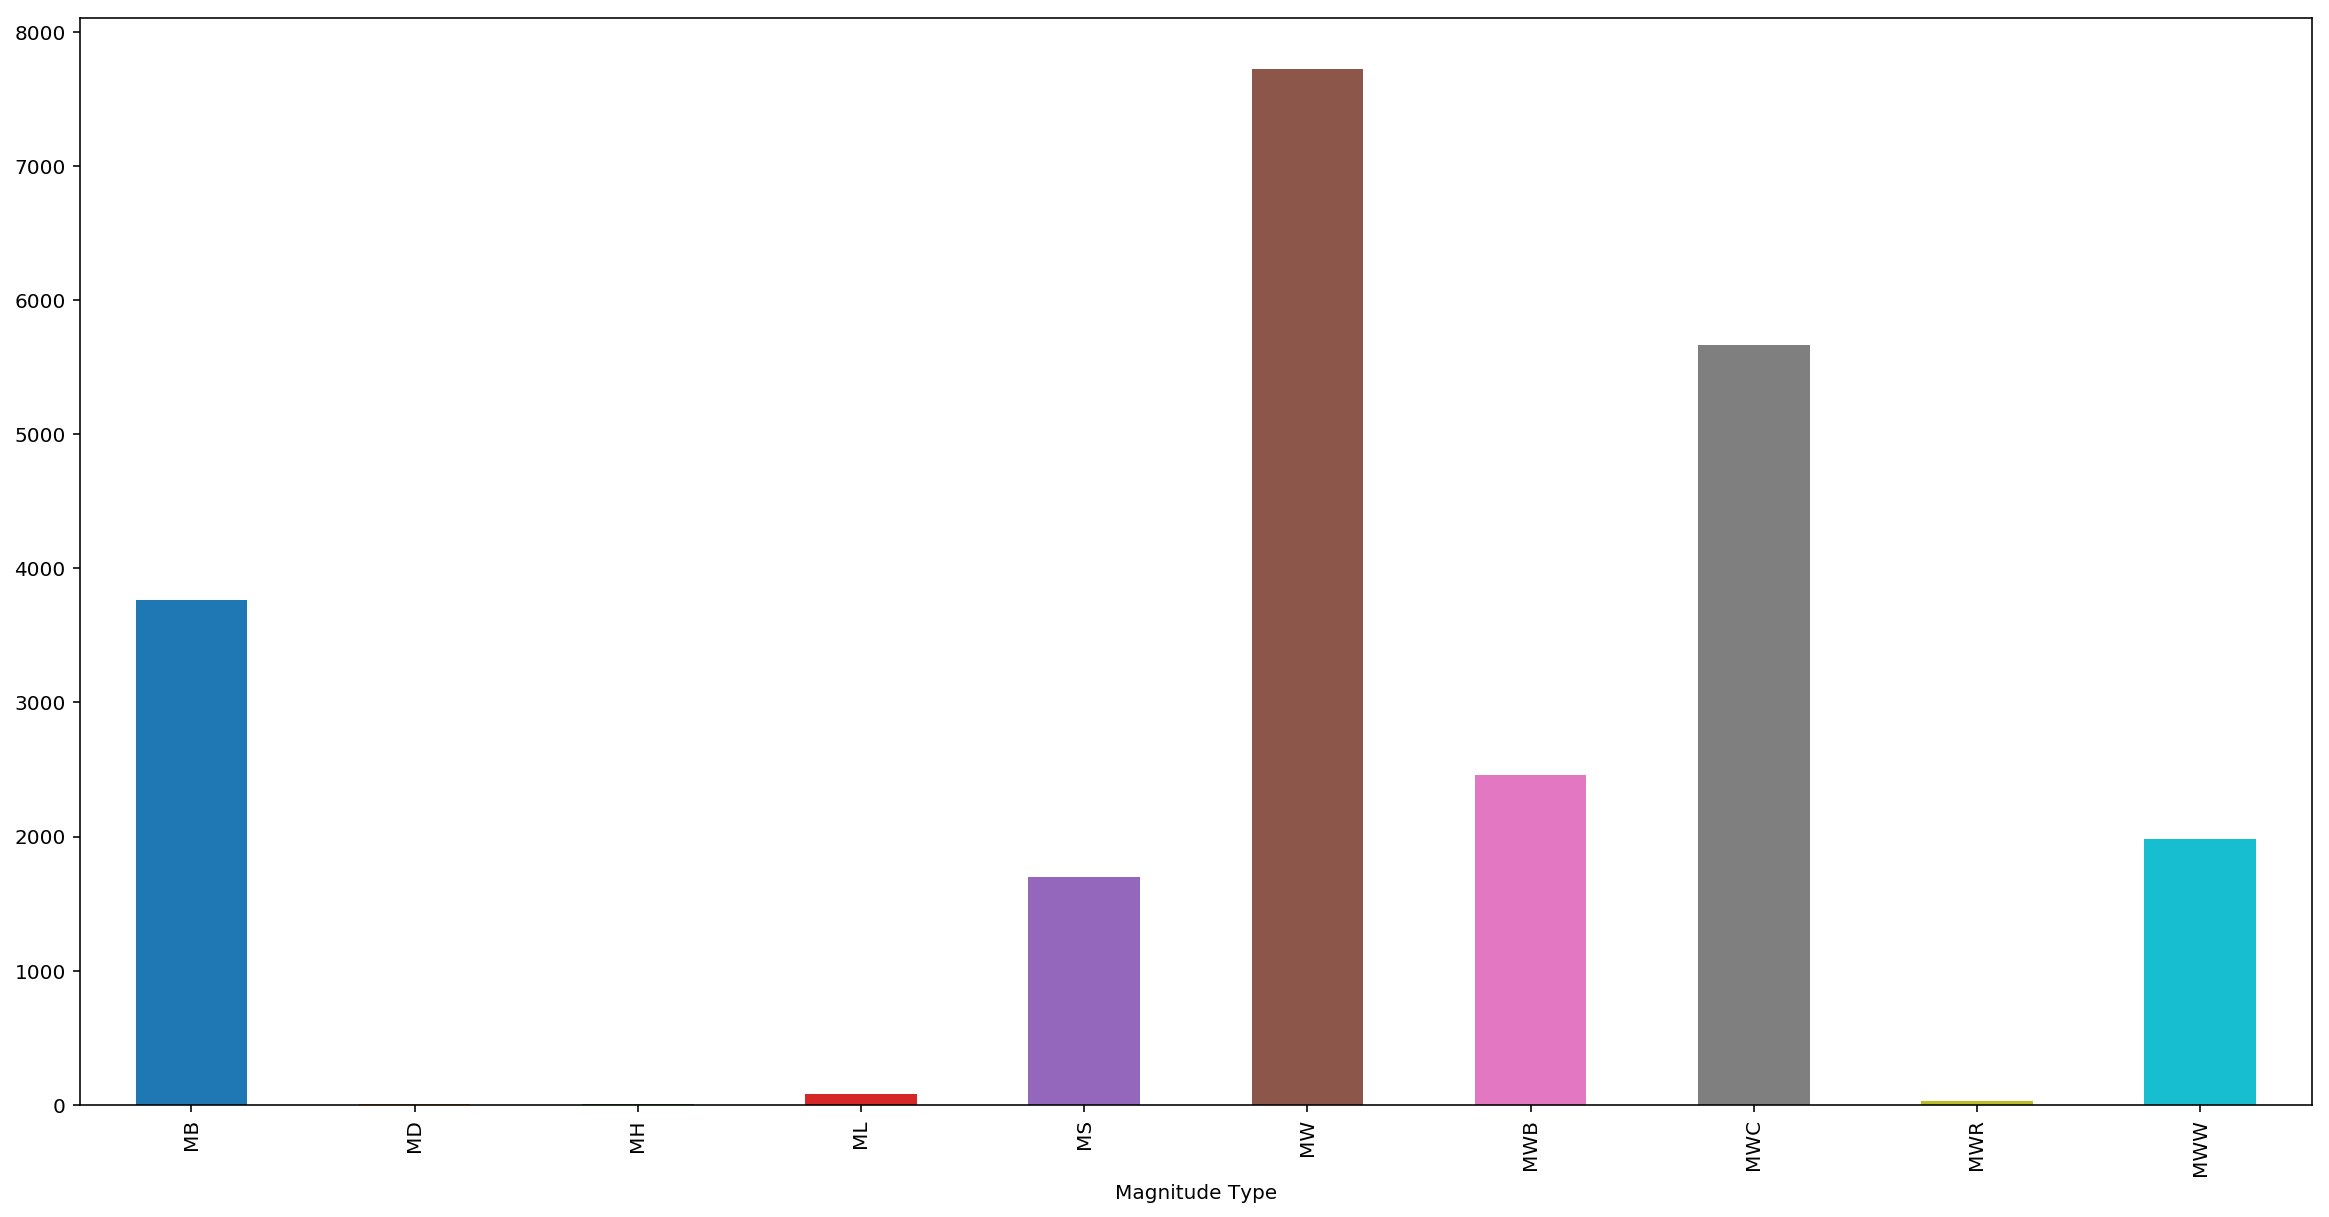

In [22]:
magnitudeTypeGroup.plot(kind="bar", figsize=(20,10));

### Frequency of Earthquakes based on the magnitude

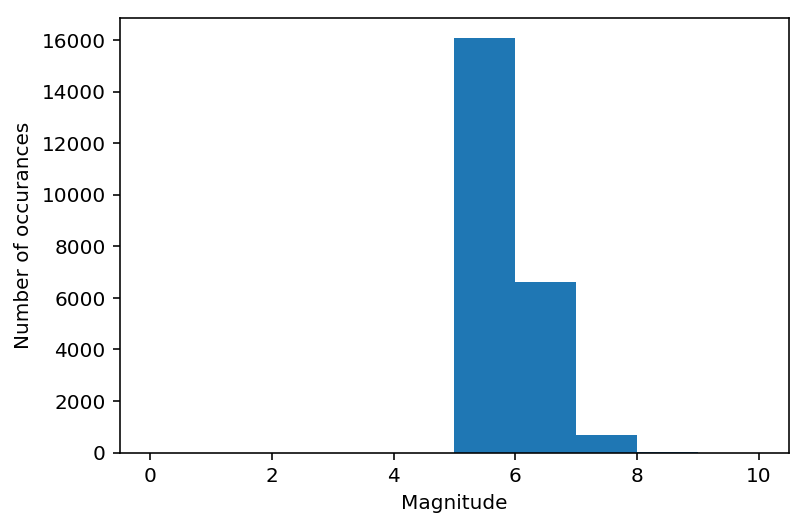

In [23]:
plt.hist(earthquakedf.Magnitude, bins = 10, range = (0,10));
plt.xlabel("Magnitude")
plt.ylabel("Number of occurances")
plt.show()

### Frequency of earthquckes per year

In [24]:
# Create a yearly coloumn
earthquakedf["Year"] = earthquakedf.Date.dt.year
earthquakedf.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,Year
0,1965-01-02,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,1965
1,1965-01-04,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,1965
2,1965-01-05,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,1965
3,1965-01-08,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,1965
4,1965-01-09,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,1965


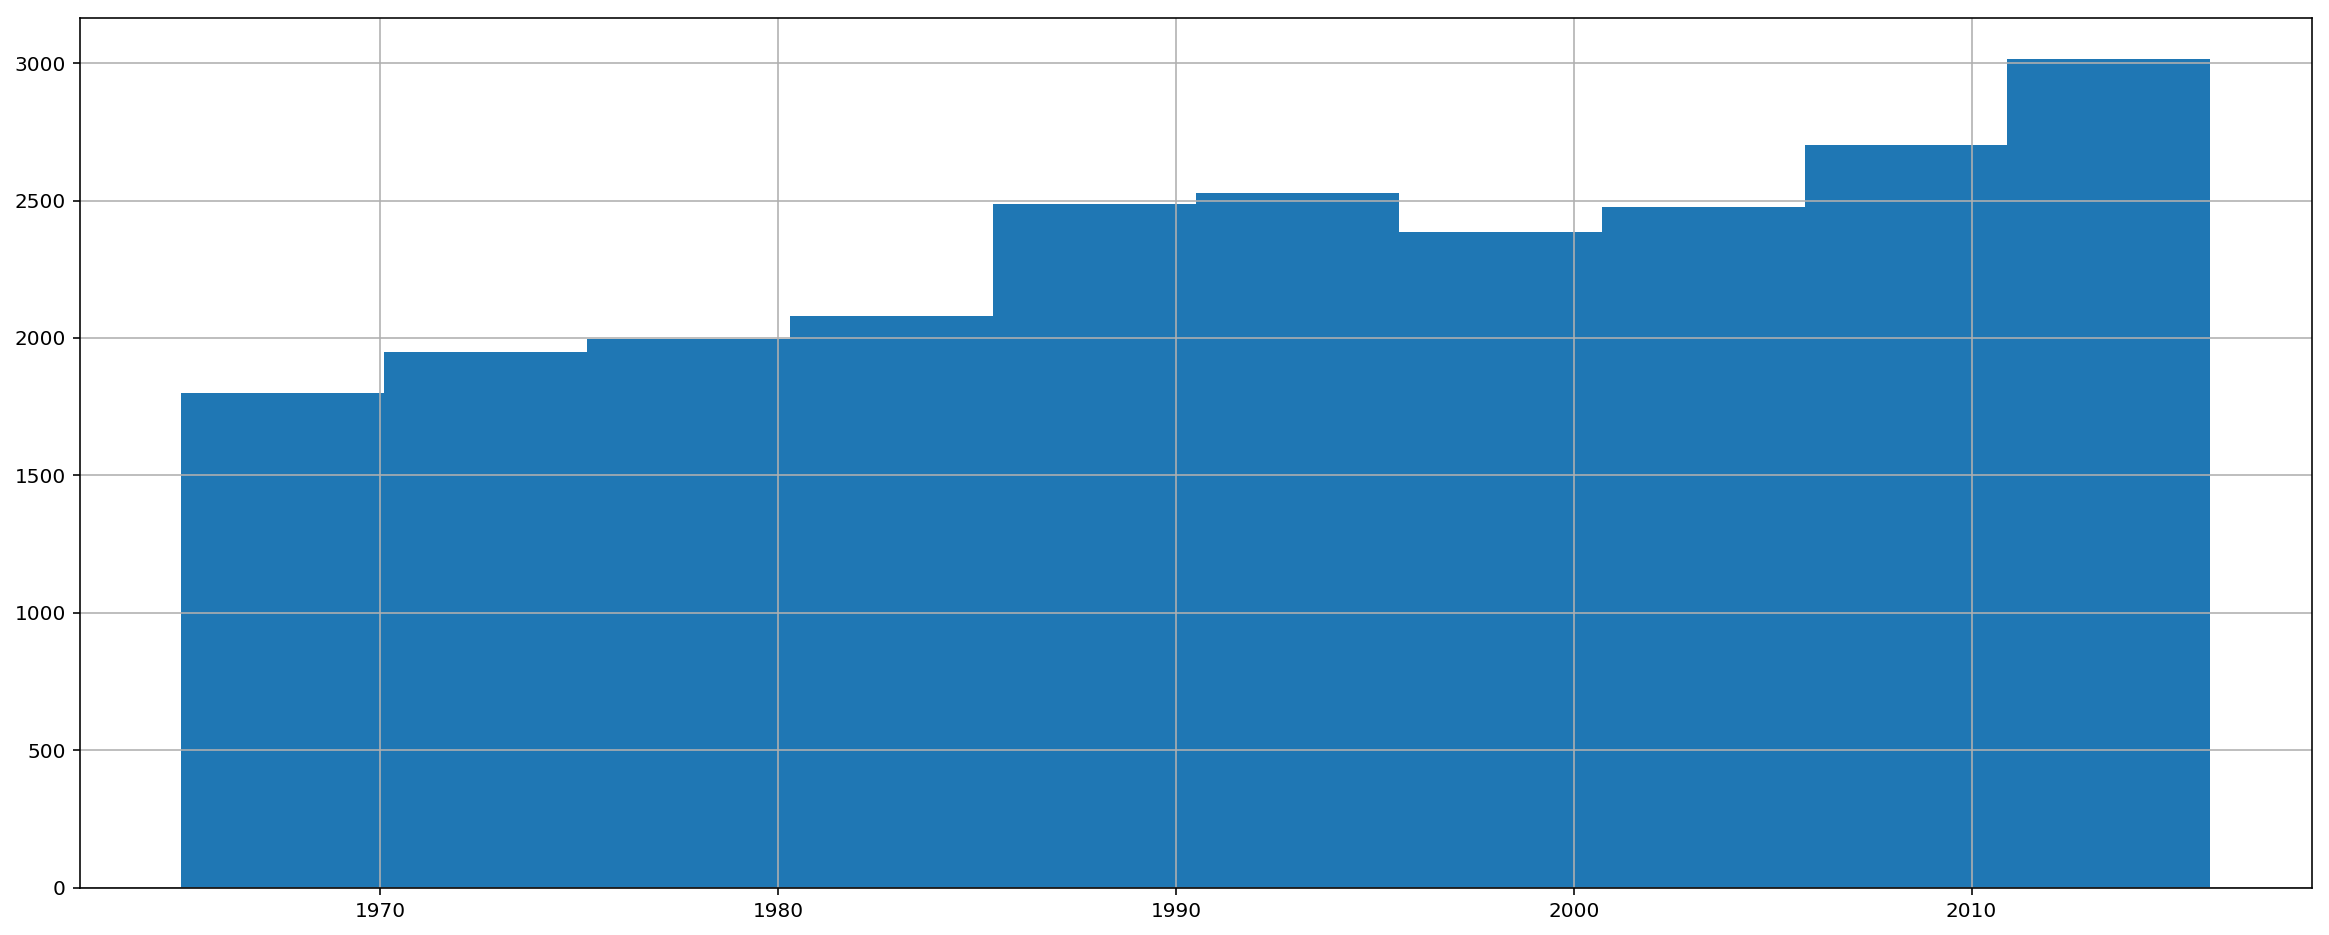

In [25]:
earthquakedf["Year"].hist(figsize=(20,8));

In [26]:
# Create yearly group
yearlyGroup = earthquakedf.groupby("Year").sum()
yearlyGroupdf = pd.DataFrame(yearlyGroup)
yearlyGroupdf.head()

,Latitude,Longitude,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square
Year,,,,,,,,,,,,
1965,4896.880000,22879.967000,24133.0,0.00,0.0,2038.80,0.000,0.0,0.0,0.0000,0.00,0.00
1966,2261.982667,12923.844333,13758.8,63.22,29.0,1413.47,0.368,14.0,596.0,1.4760,198.00,1.46
1967,2092.339000,14057.641000,18617.4,0.00,0.0,1531.00,0.000,0.0,0.0,0.0000,0.00,0.00
1968,3462.135667,20034.769667,20323.1,94.83,48.0,1853.95,0.344,12.0,646.0,3.4542,198.88,2.72
1969,5150.667167,19261.902333,19818.1,31.61,13.0,1941.02,0.187,8.0,268.0,1.4370,99.00,0.33


### Plotting the epicentres of earthquakes

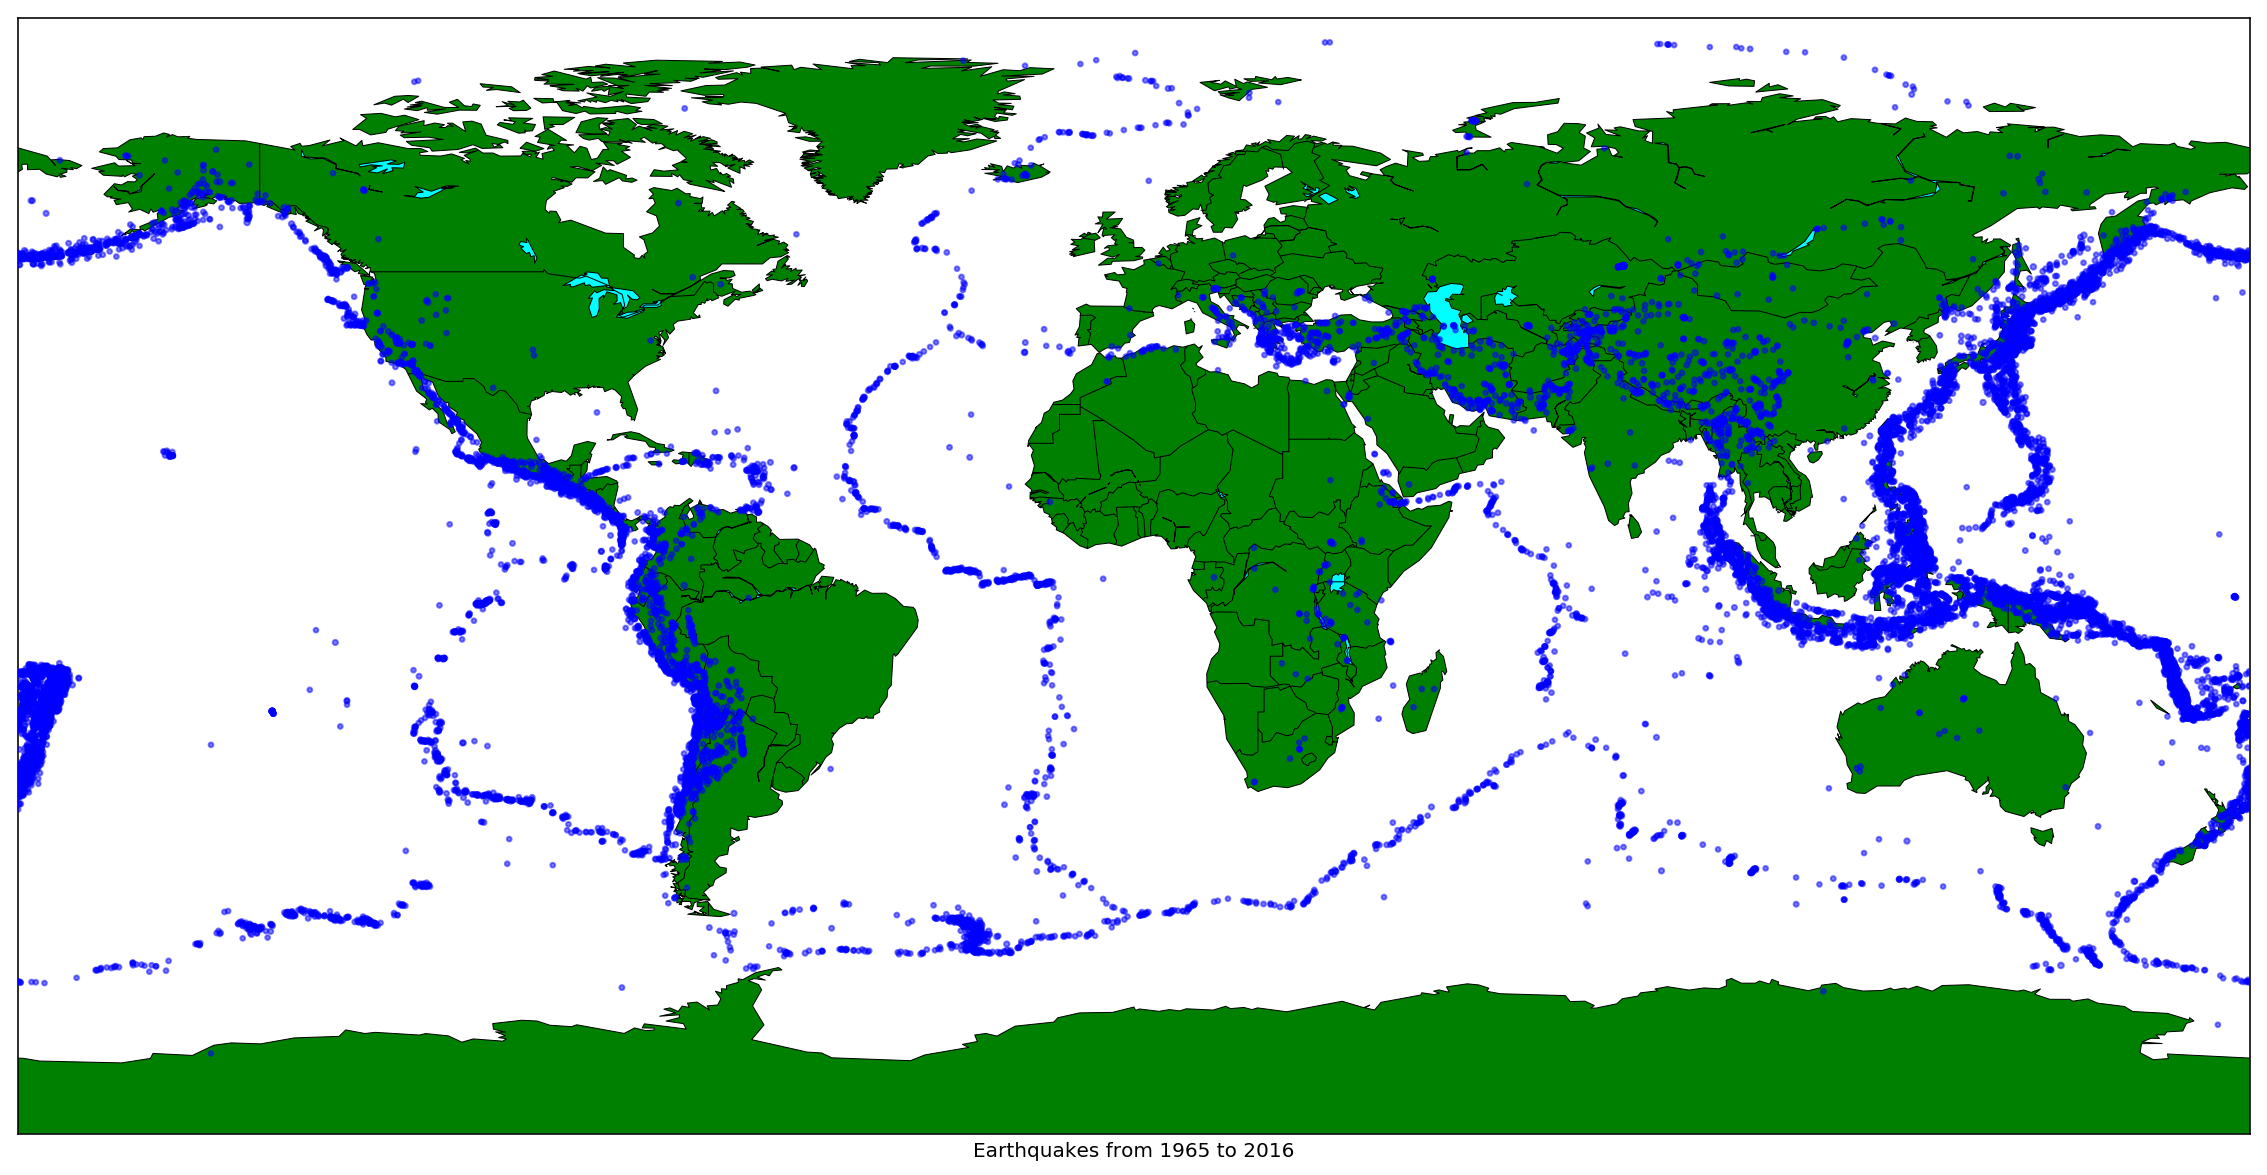

In [27]:
# Let us plot earthquake positions
fig, ax = plt.subplots()
worldmap = Basemap(ax=ax)
worldmap.drawcoastlines(color='black', linewidth=0.5)
worldmap.fillcontinents(color='green', lake_color='aqua')
worldmap.drawcountries()
ax.scatter(earthquakedf.Longitude, earthquakedf.Latitude, earthquakedf.Magnitude, c='blue', alpha=0.5, zorder=10)
ax.set_xlabel("Earthquakes from 1965 to 2016")
fig.set_size_inches(20,16)
fig.savefig('Earthquakes-1965-2016.png')

From the above we can see that the earth quakes are occurring manly along the tectonic plates, this is due to the movement of the tectonic plates.  When a tectonic plate is trying to push another tectonic plate, pressure builds up over the time. Whenever the buildup pressure/stress exceeds the strength of the tectonic rock, rupture/cracks happens in the tectonic plates, this results into a huge energy transfer across earth surface layers, results into earthquakes. 